In [24]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd

# Importación de las clases creadas en nuestro archivo de soporte
# -----------------------------------------------------------------------
from src import soporte_outliers as so

In [25]:
# abrimos el fichero con el que hemos trabajado hasta ahora
df = pd.read_csv("datos/datos_nonulls.csv", index_col = 0)
df.head(2)

,propertyType,size,exterior,rooms,bathrooms,municipality,showAddress,distance,status,newDevelopment,floor,district,neighborhood,hasLift,hasParkingSpace,isParkingSpaceIncludedInPrice,typology,subTypology,priceByArea_knn,parkingSpacePrice_knn
price,,,,,,,,,,,,,,,,,,,,
750.0,flat,60.0,True,1,1,Madrid,True,7037,good,False,3,Hortaleza,Canillas,True,Unknown,Unknown,flat,Unknown,13.0,3795.0
750.0,flat,70.0,True,2,1,San Sebastián de los Reyes,False,16145,good,False,bj,Centro Urbano,Unknown,False,Unknown,Unknown,flat,Unknown,11.0,3795.0


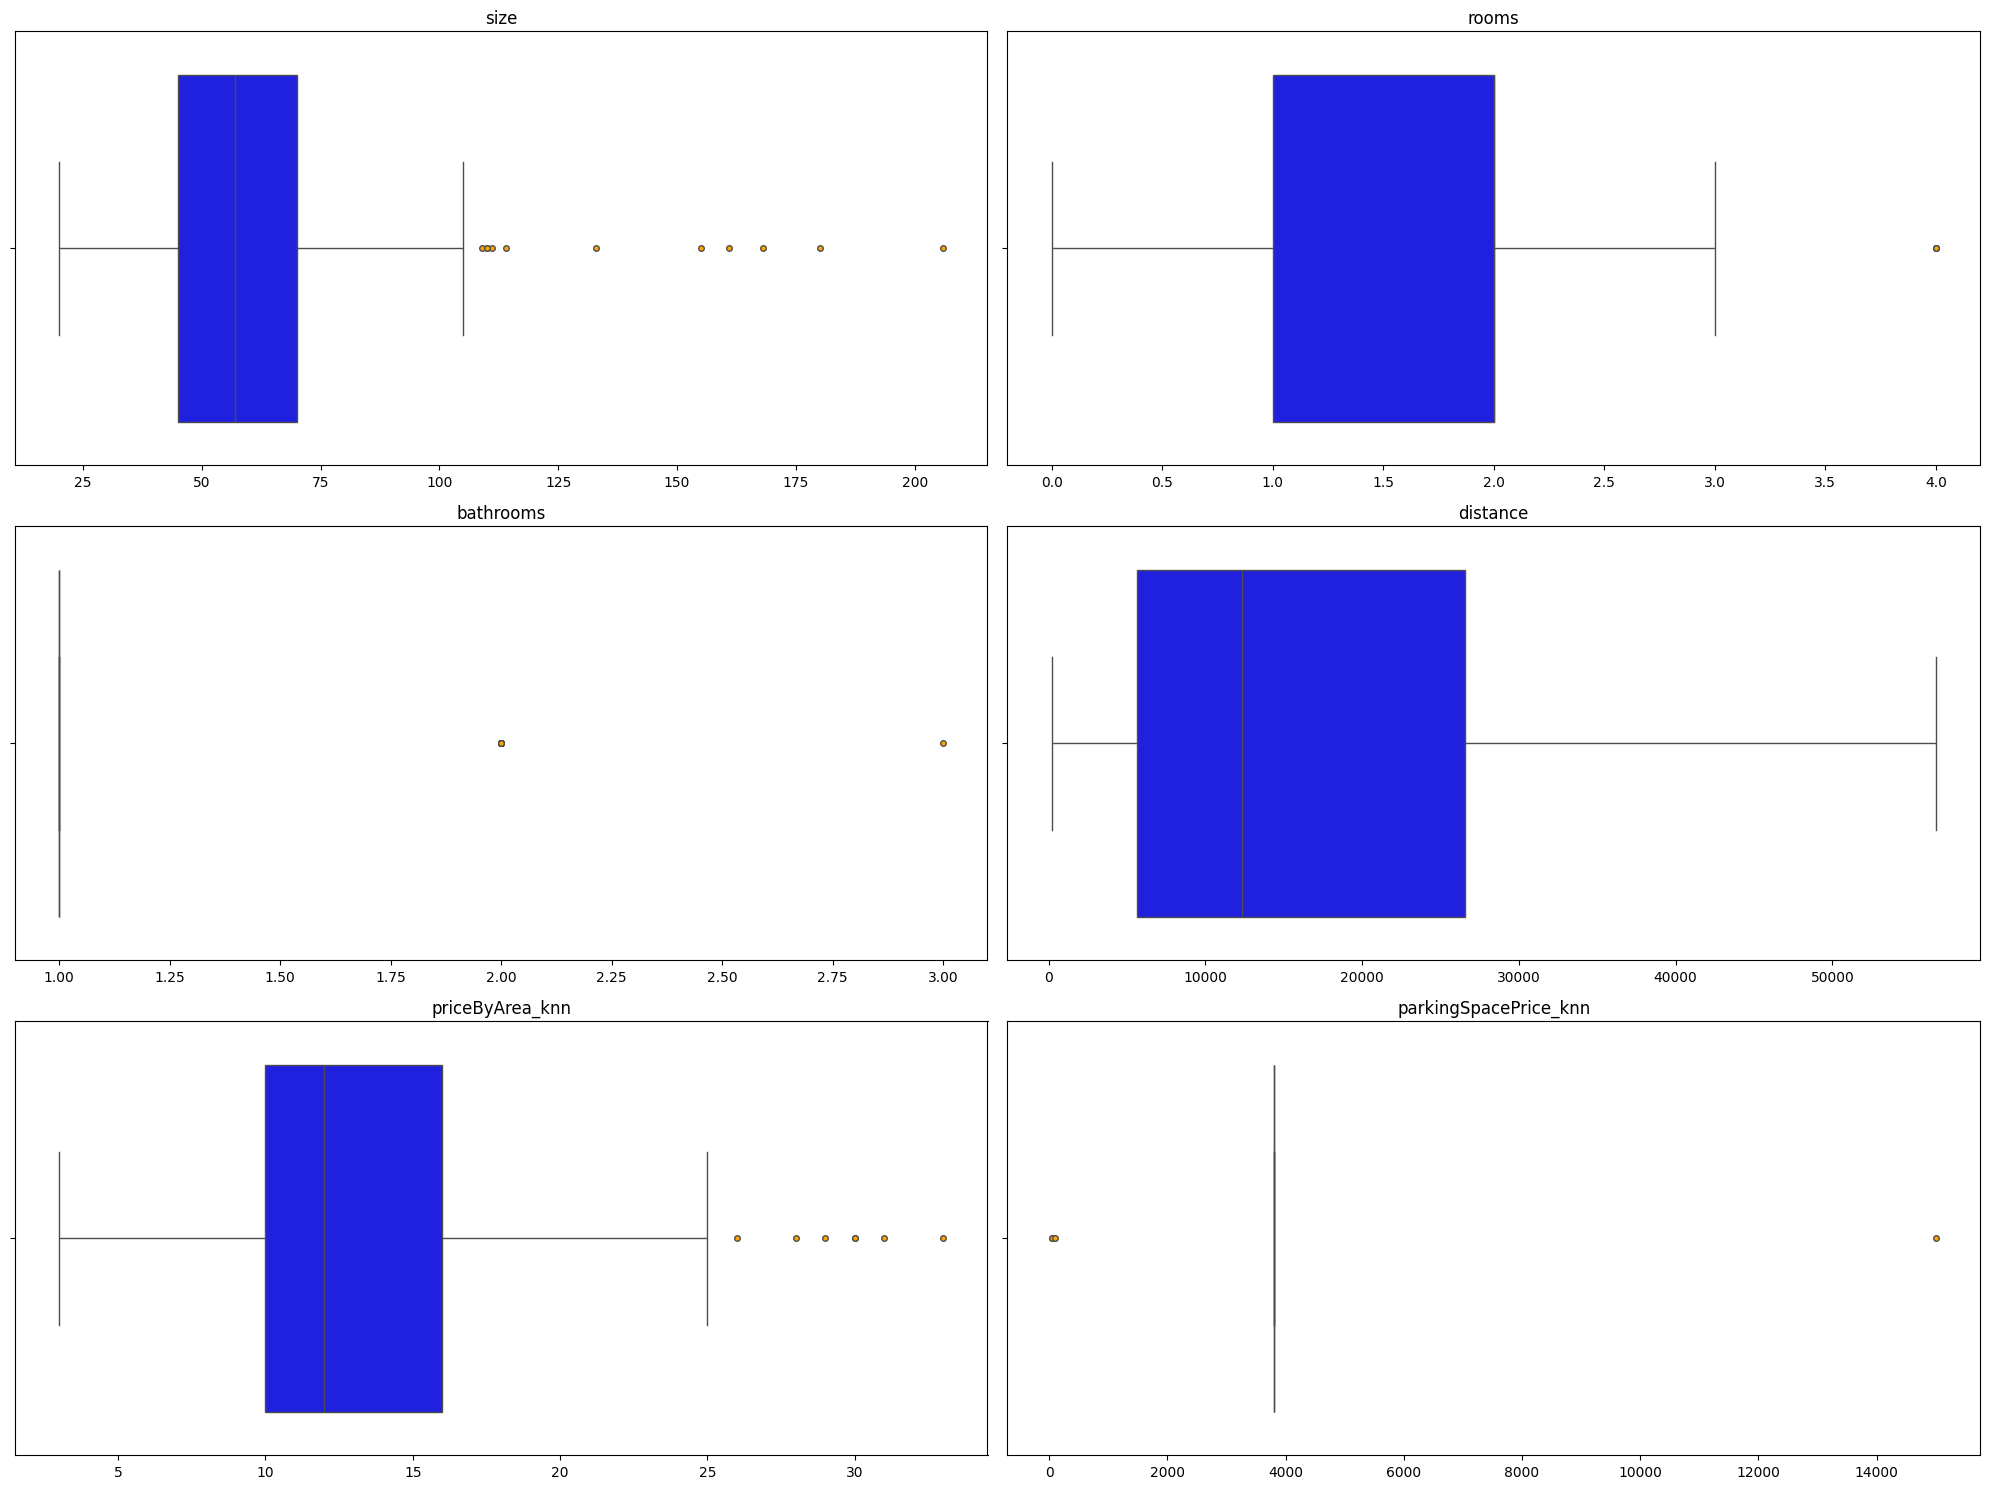

In [26]:
# instanciamos la clase que nos permite identificar y gestionar outliers
gestion = so.GestionOutliersUnivariados(df)

# llamamos al método que nos permite identificar outliers univariados de forma visual (histograma y boxplot)
gestion.visualizar_outliers_univariados()

In [27]:
#vamos a detectar los outlaiers mediante el metodo IQR
outliers_iqr = gestion.detectar_outliers_iqr()

La cantidad de outliers que tenemos para la columna SIZE es 175
La cantidad de outliers que tenemos para la columna ROOMS es 107
La cantidad de outliers que tenemos para la columna BATHROOMS es 220
La cantidad de outliers que tenemos para la columna PRICEBYAREA_KNN es 134
La cantidad de outliers que tenemos para la columna PARKINGSPACEPRICE_KNN es 130


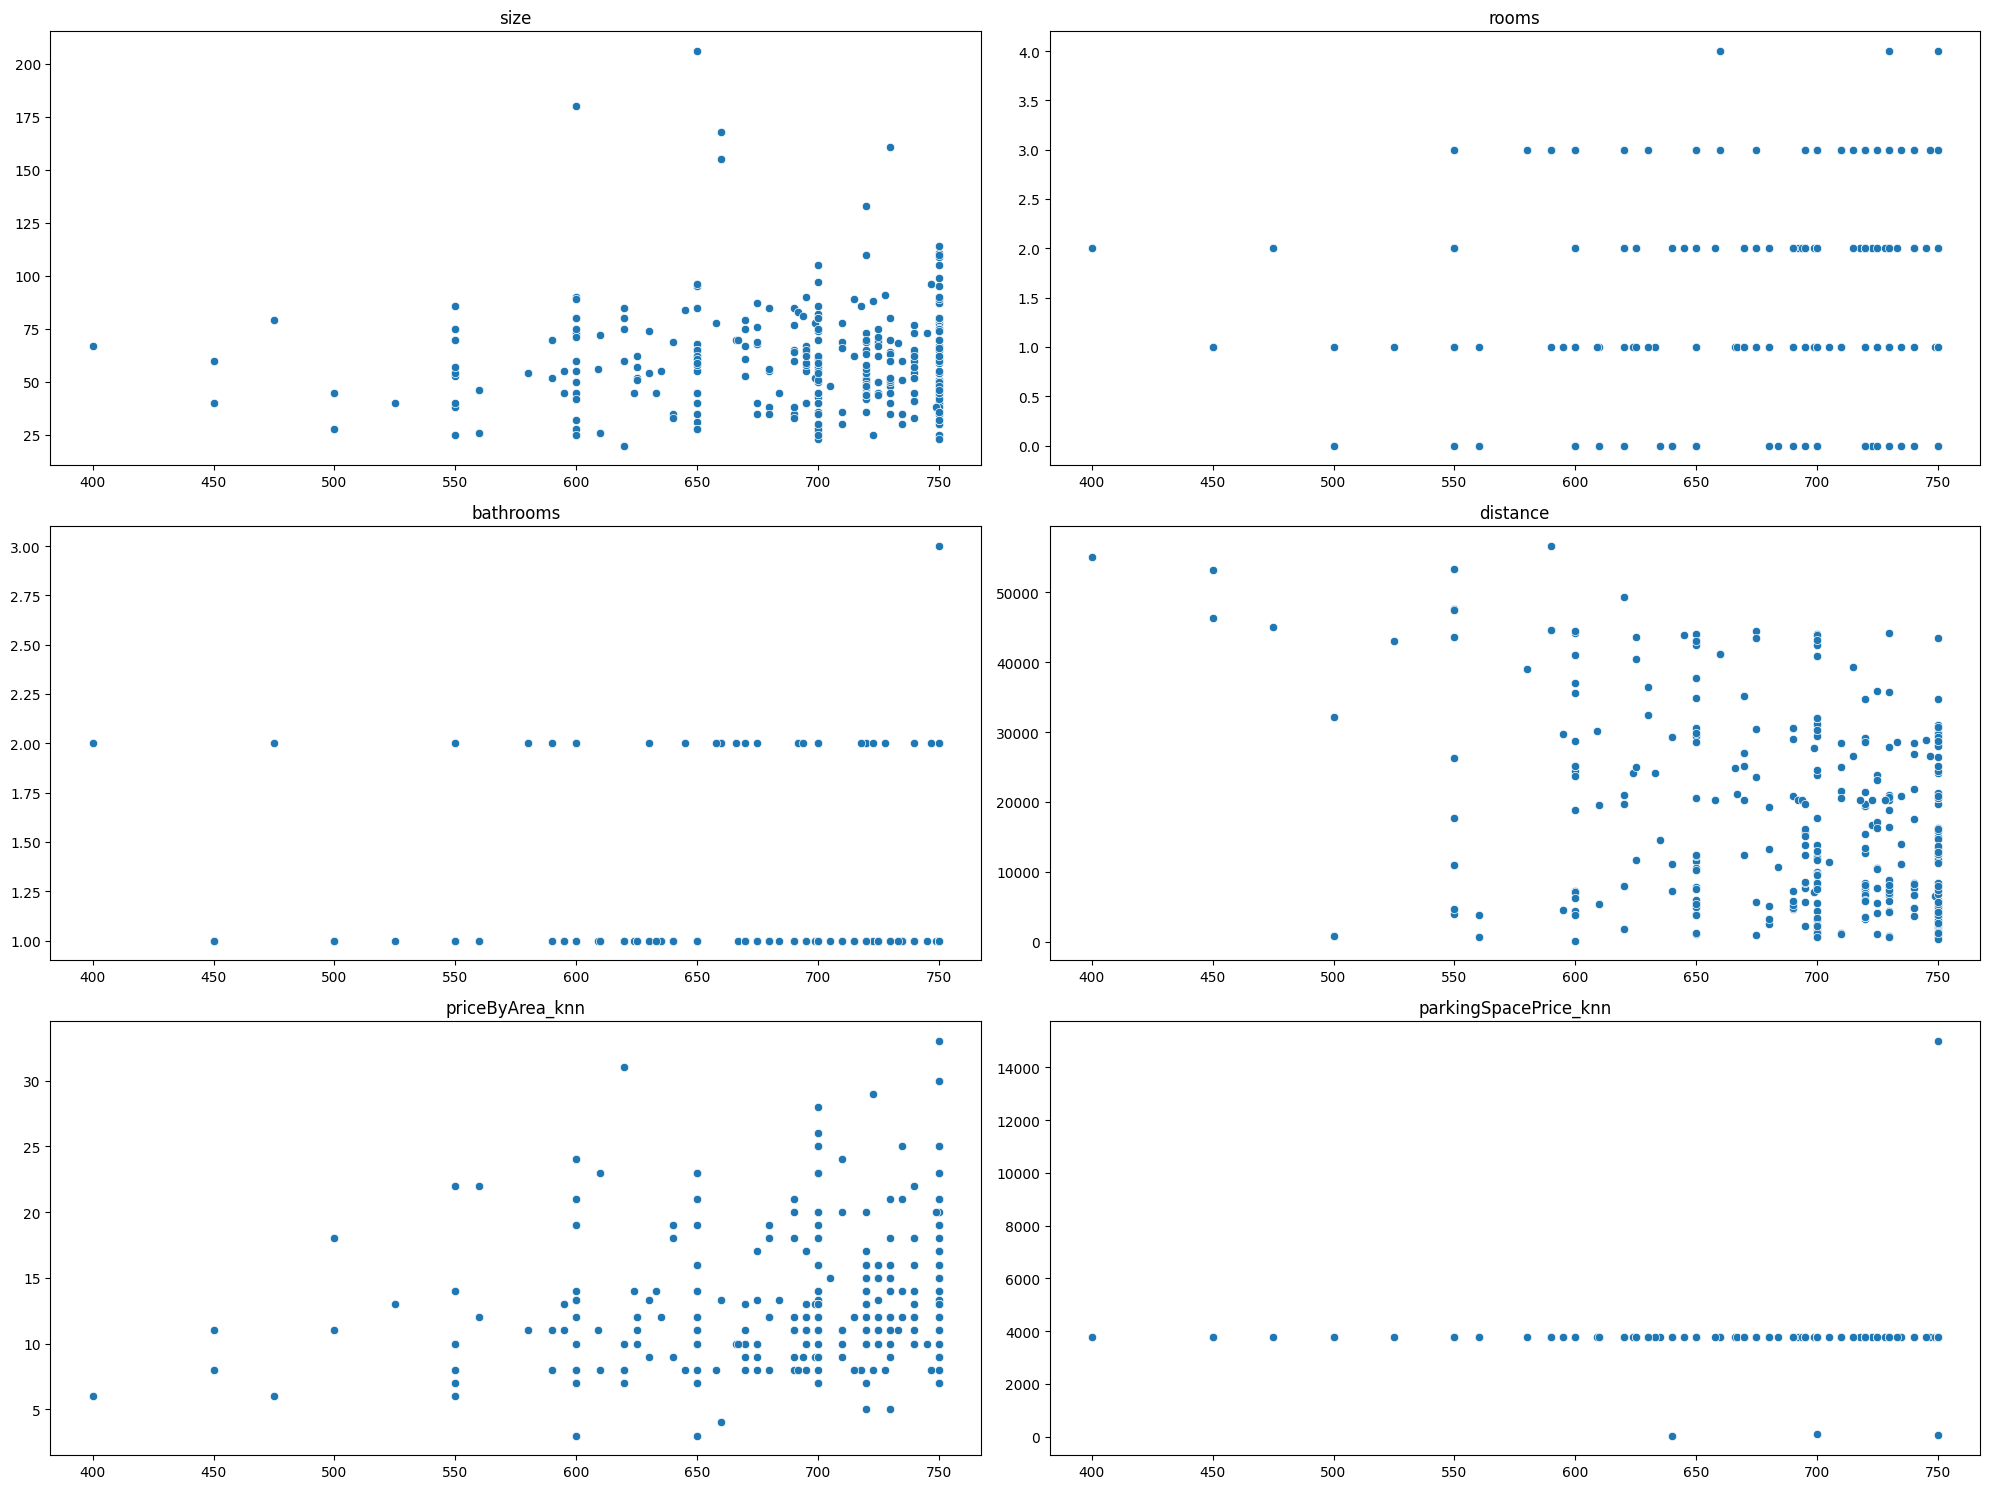

In [28]:
# instanciamos la clase de indentificación de Outliers Multivariados
gestion_multi= so.GestionOutliersMultivariados(df)

# llamamos al método que nos permite identificar los outliers
gestion_multi.visualizar_outliers_bivariados("price")

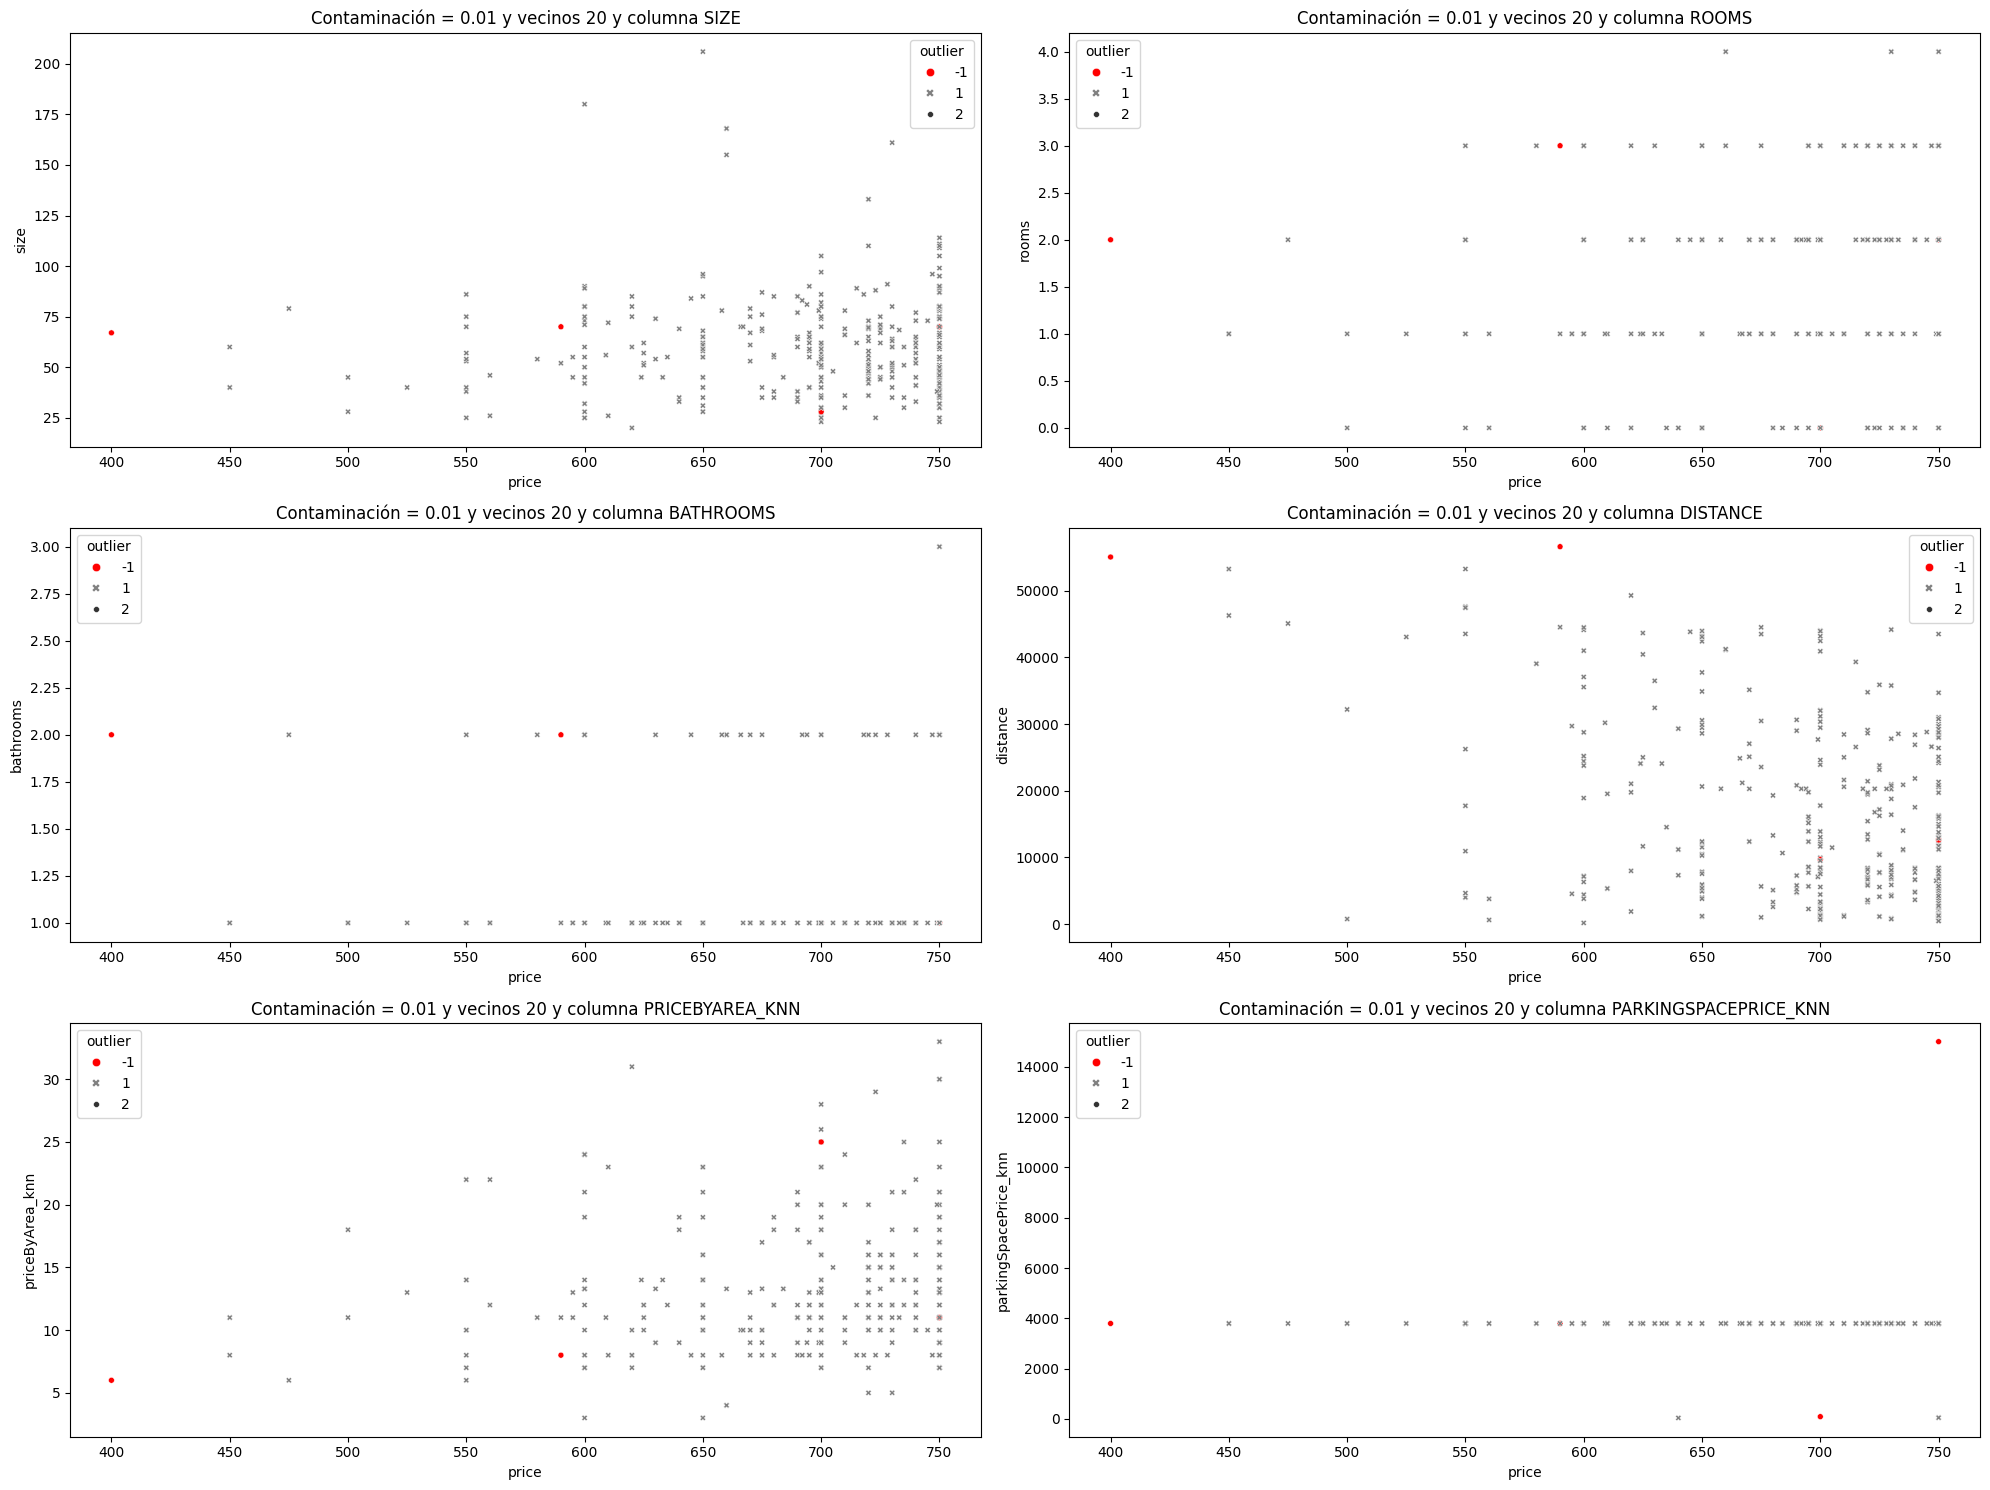

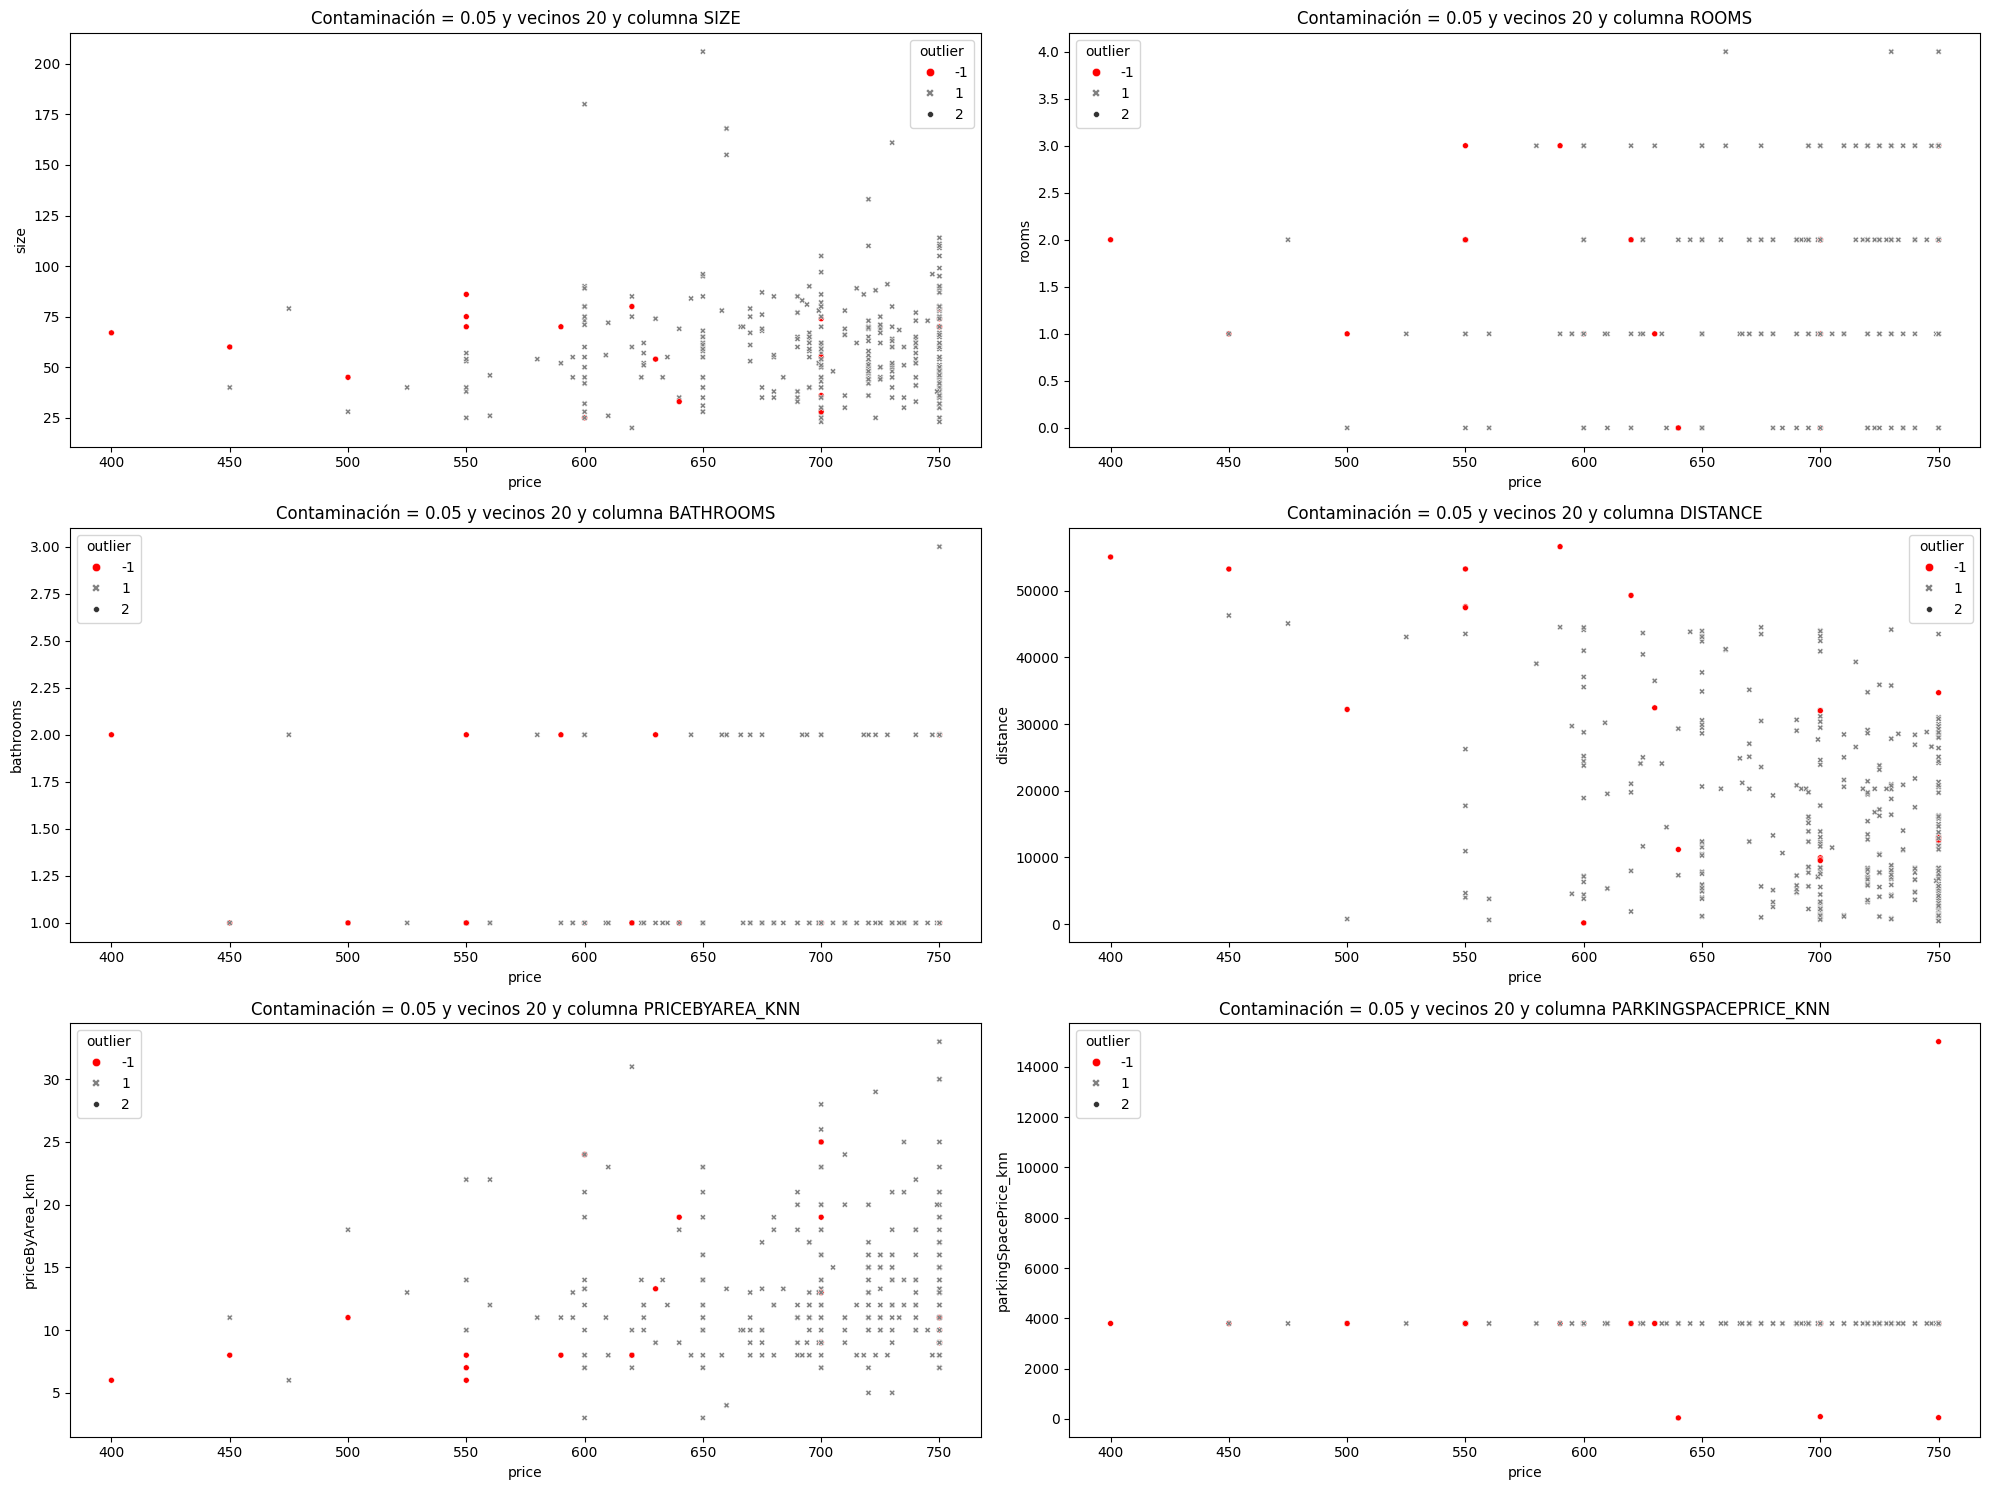

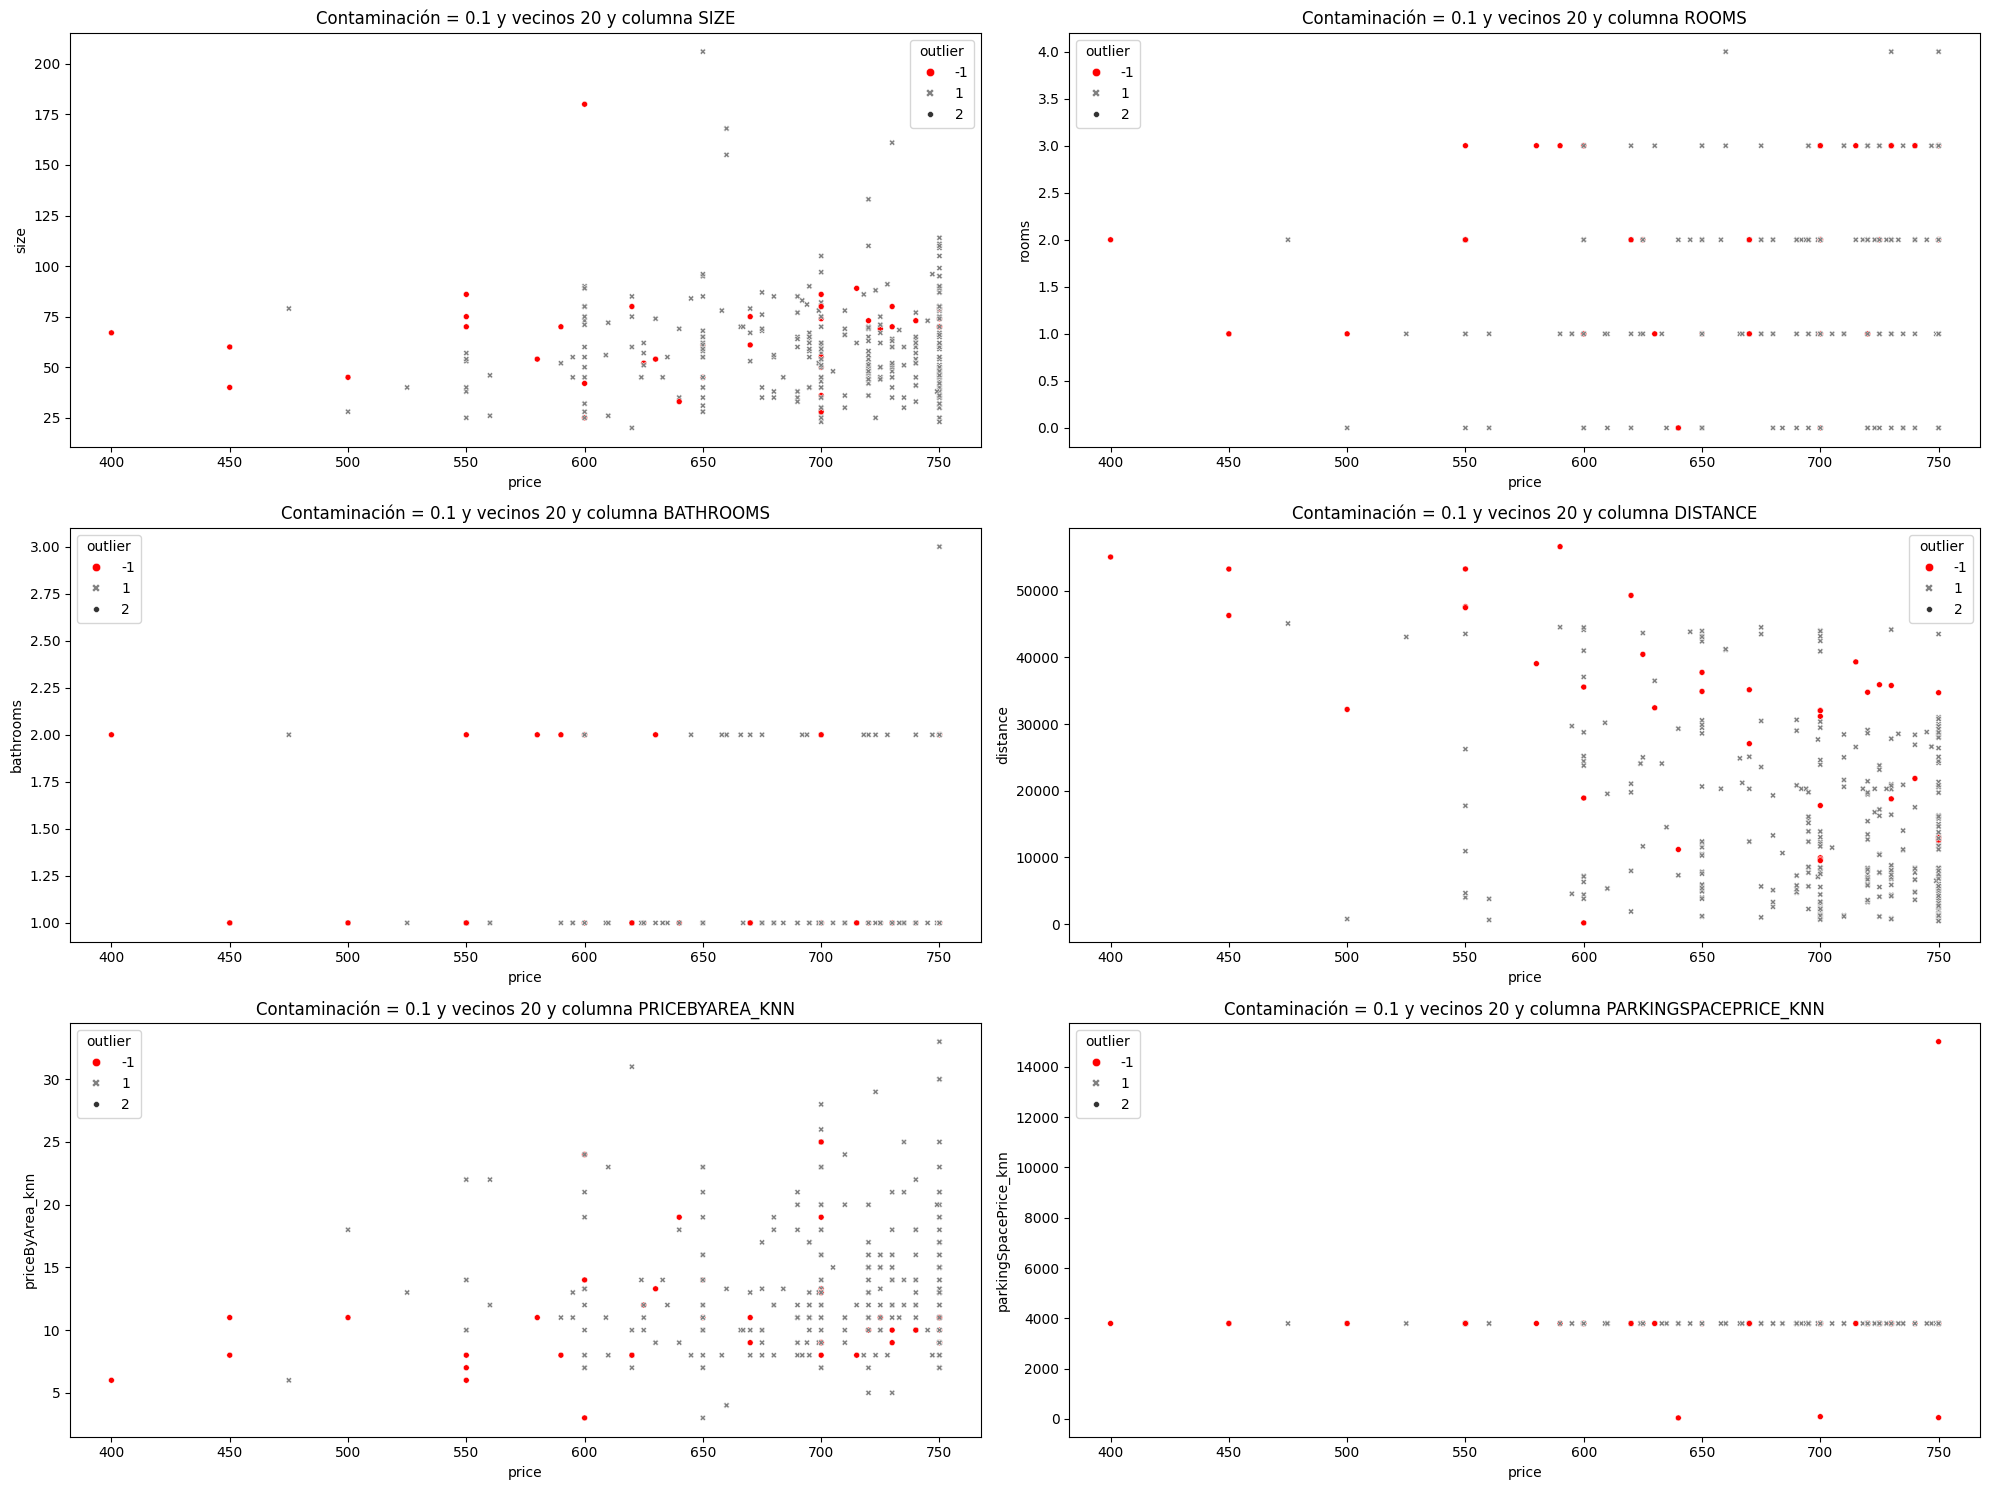

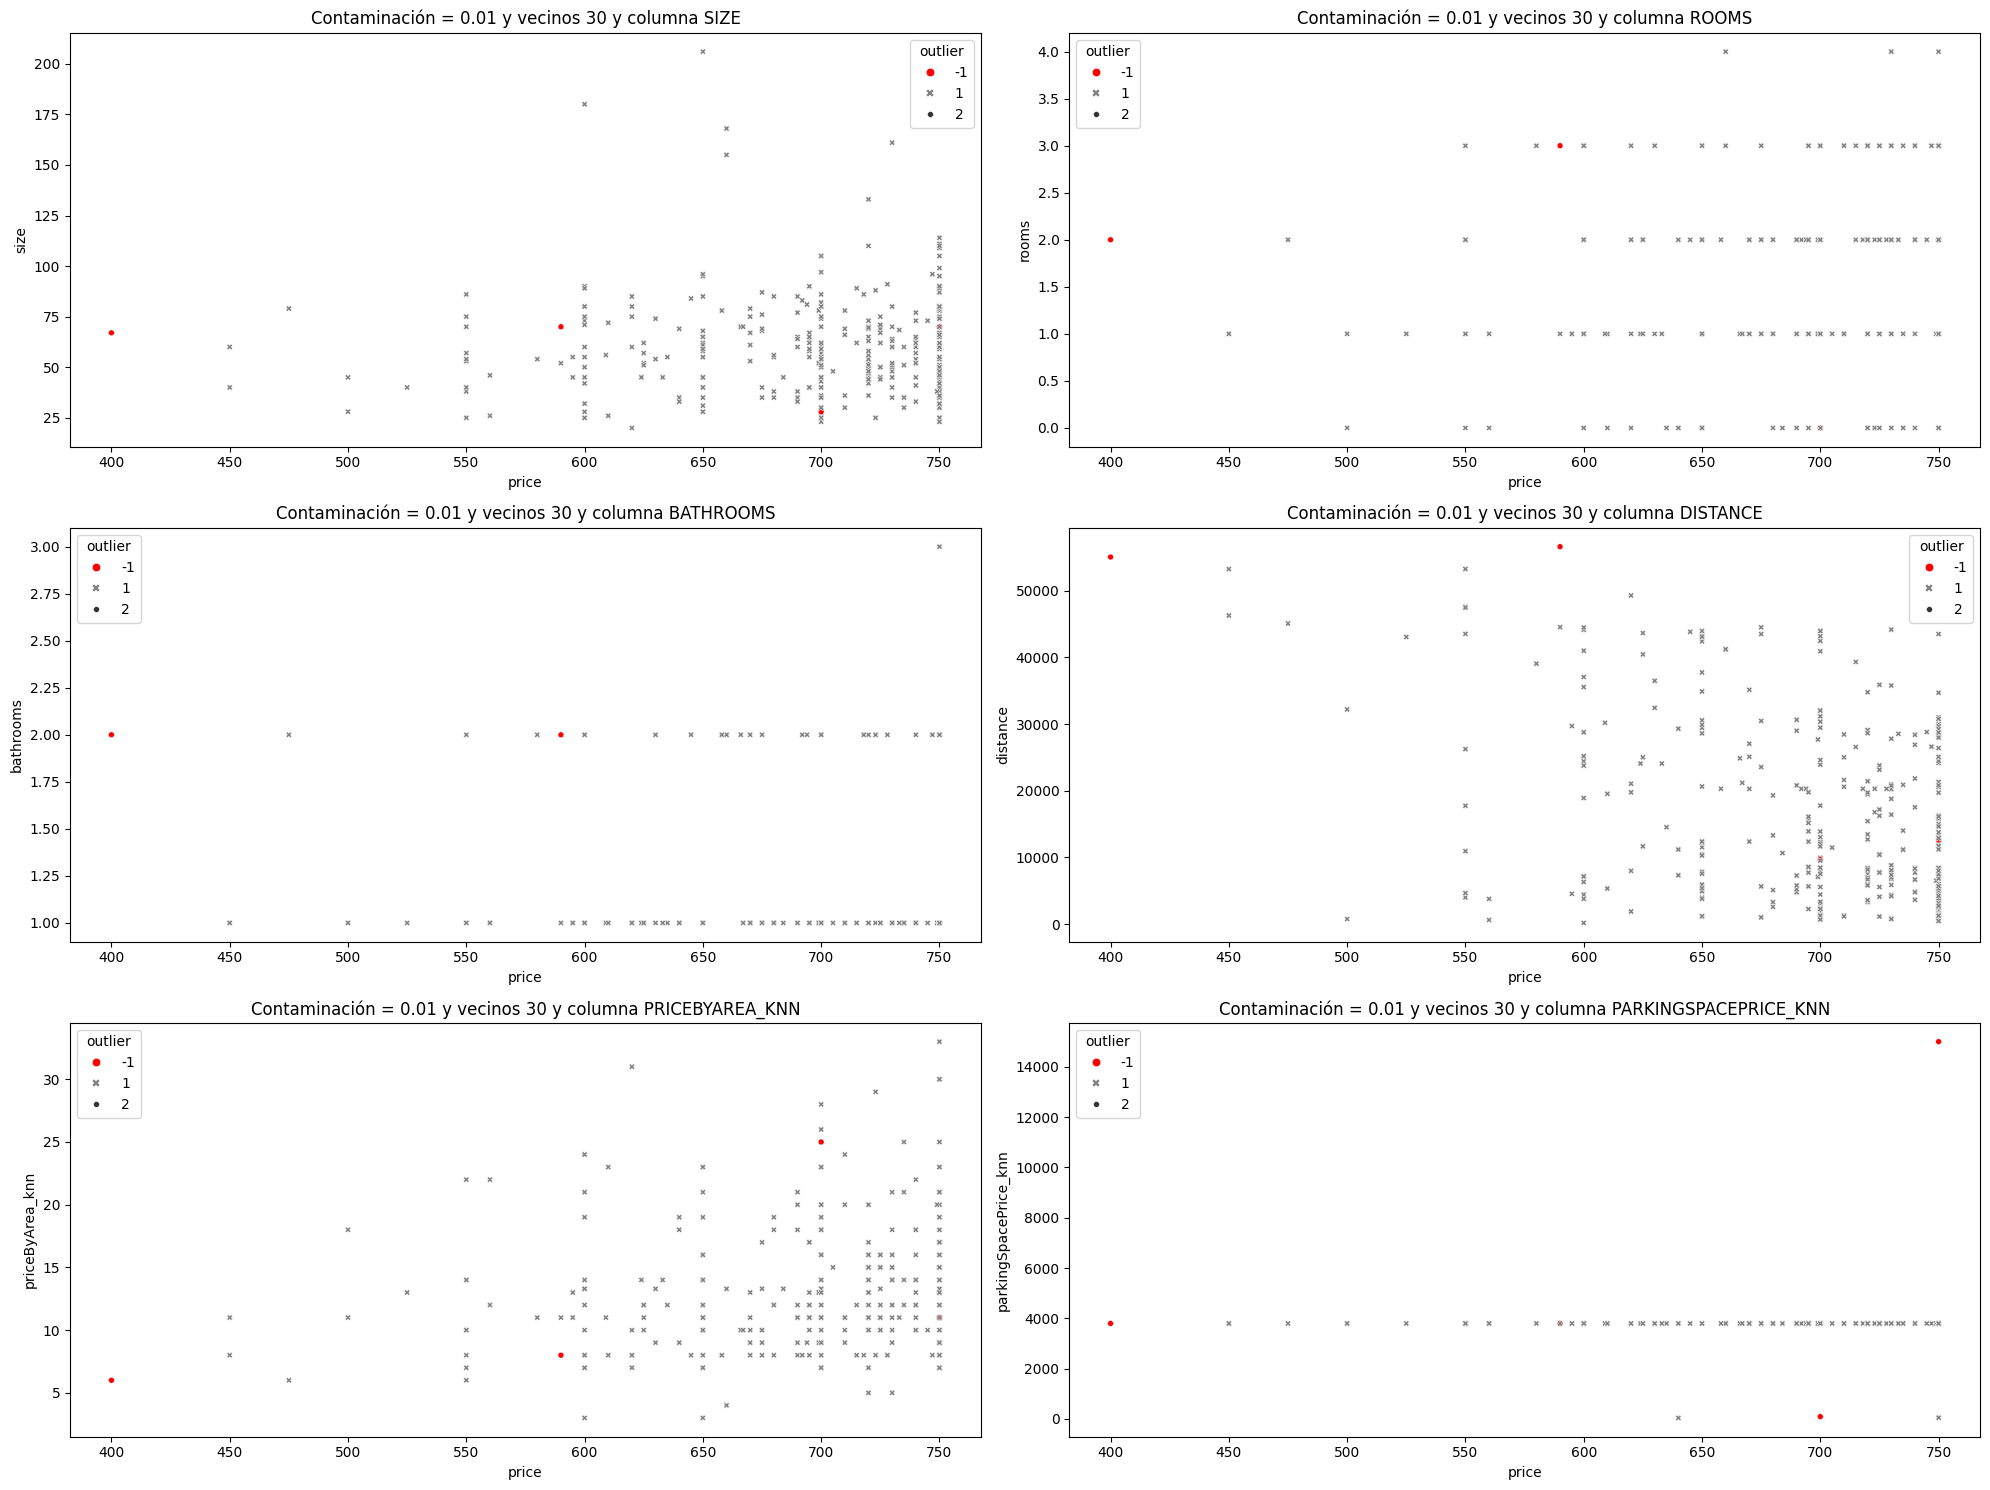

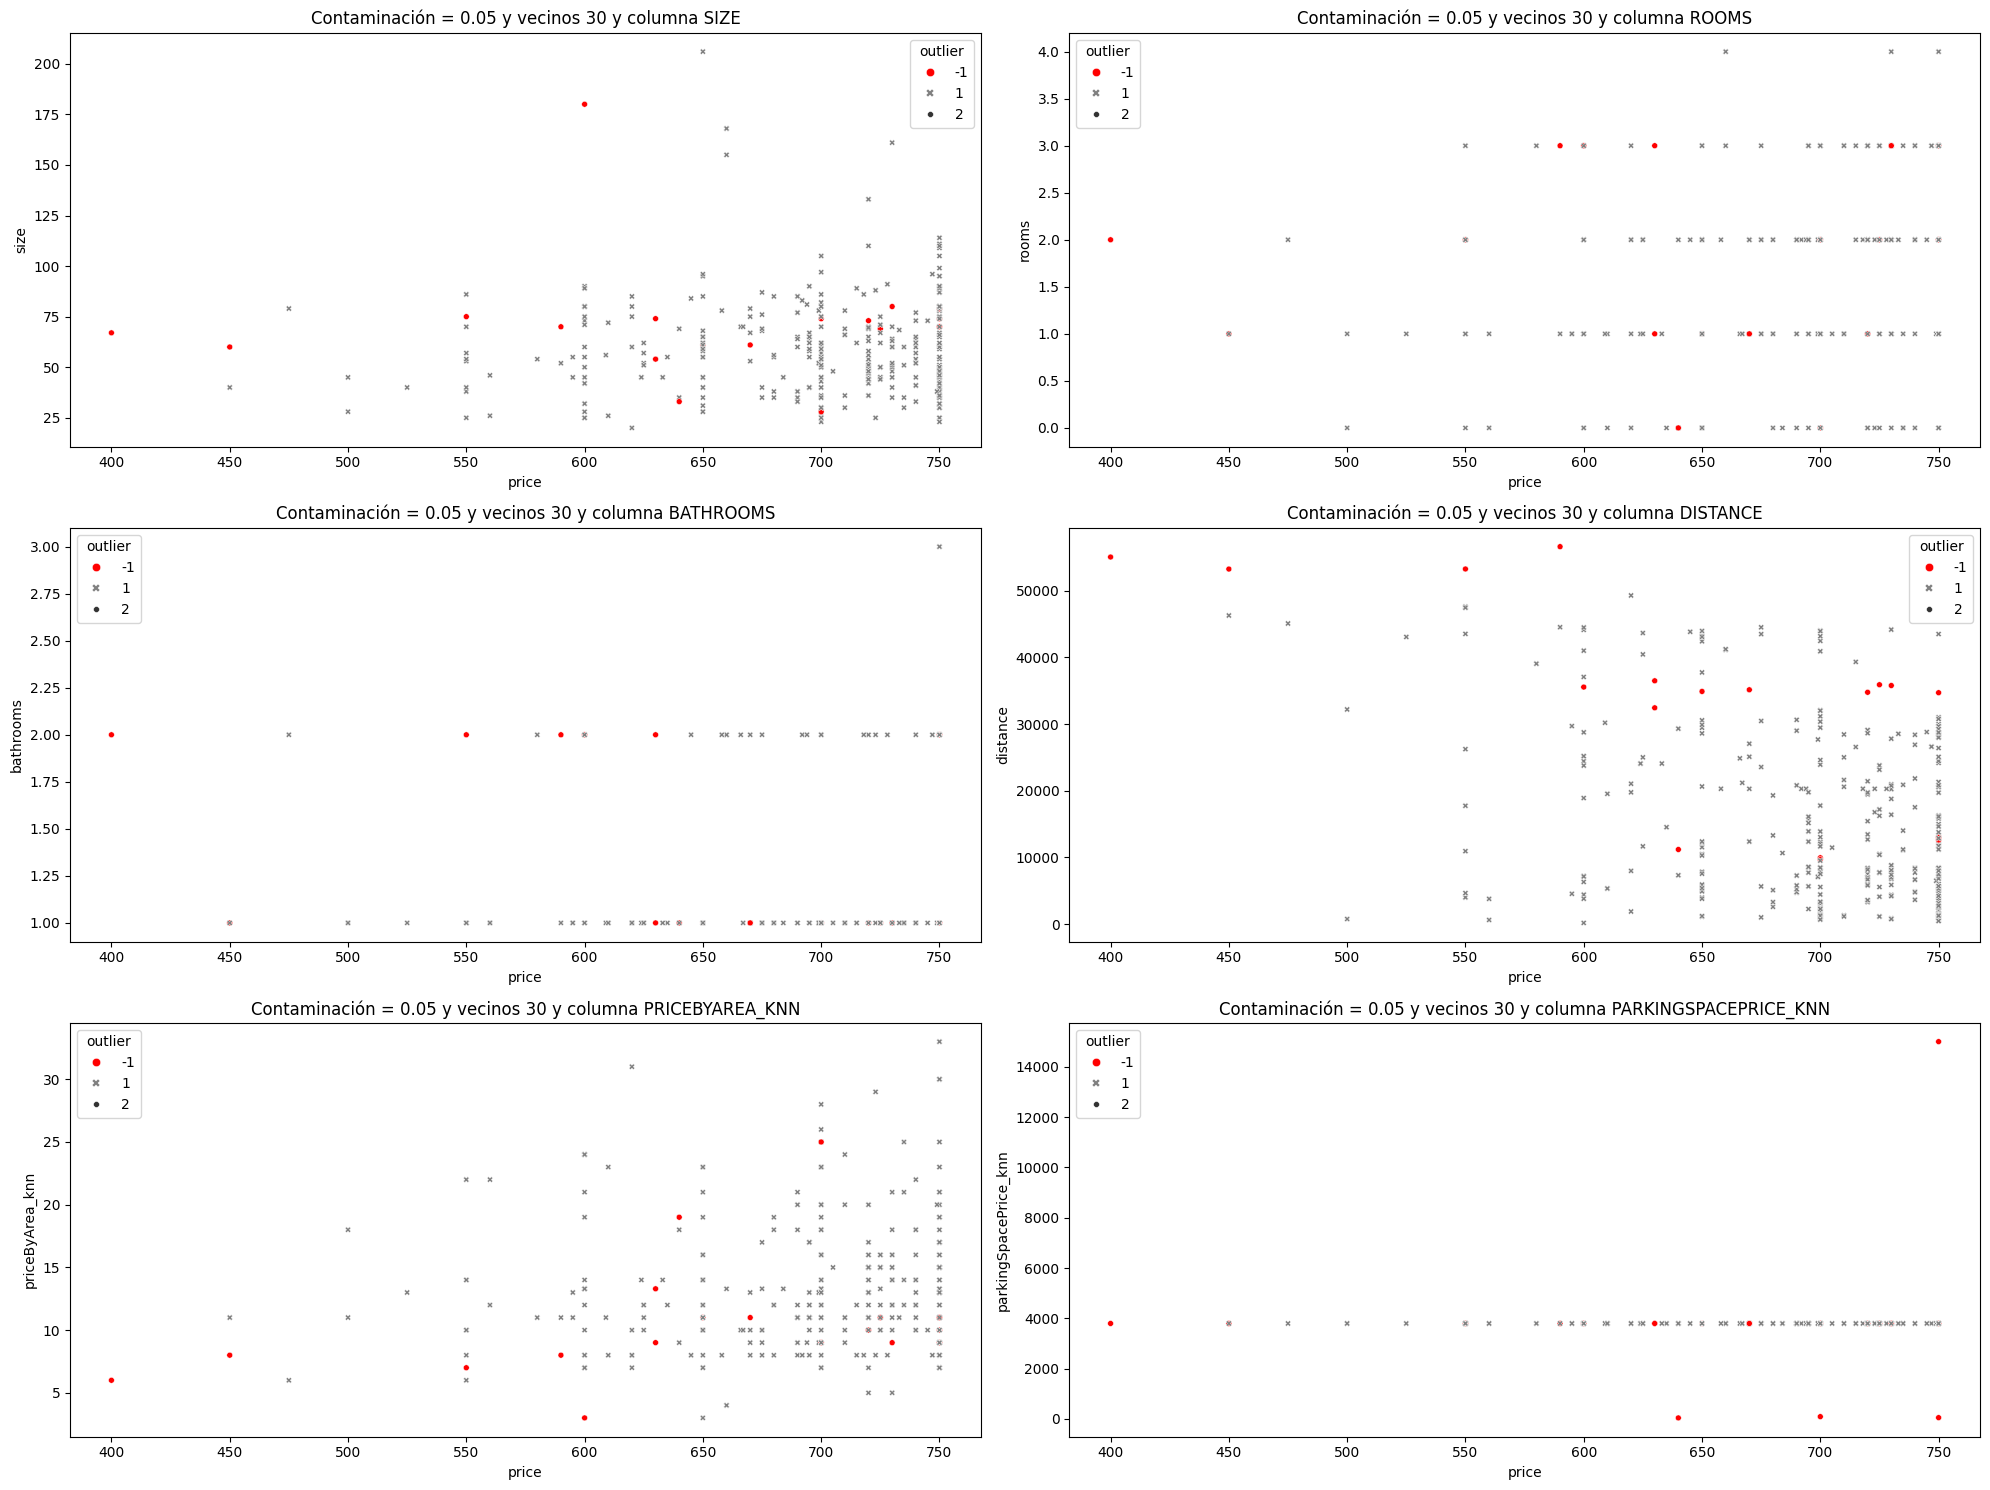

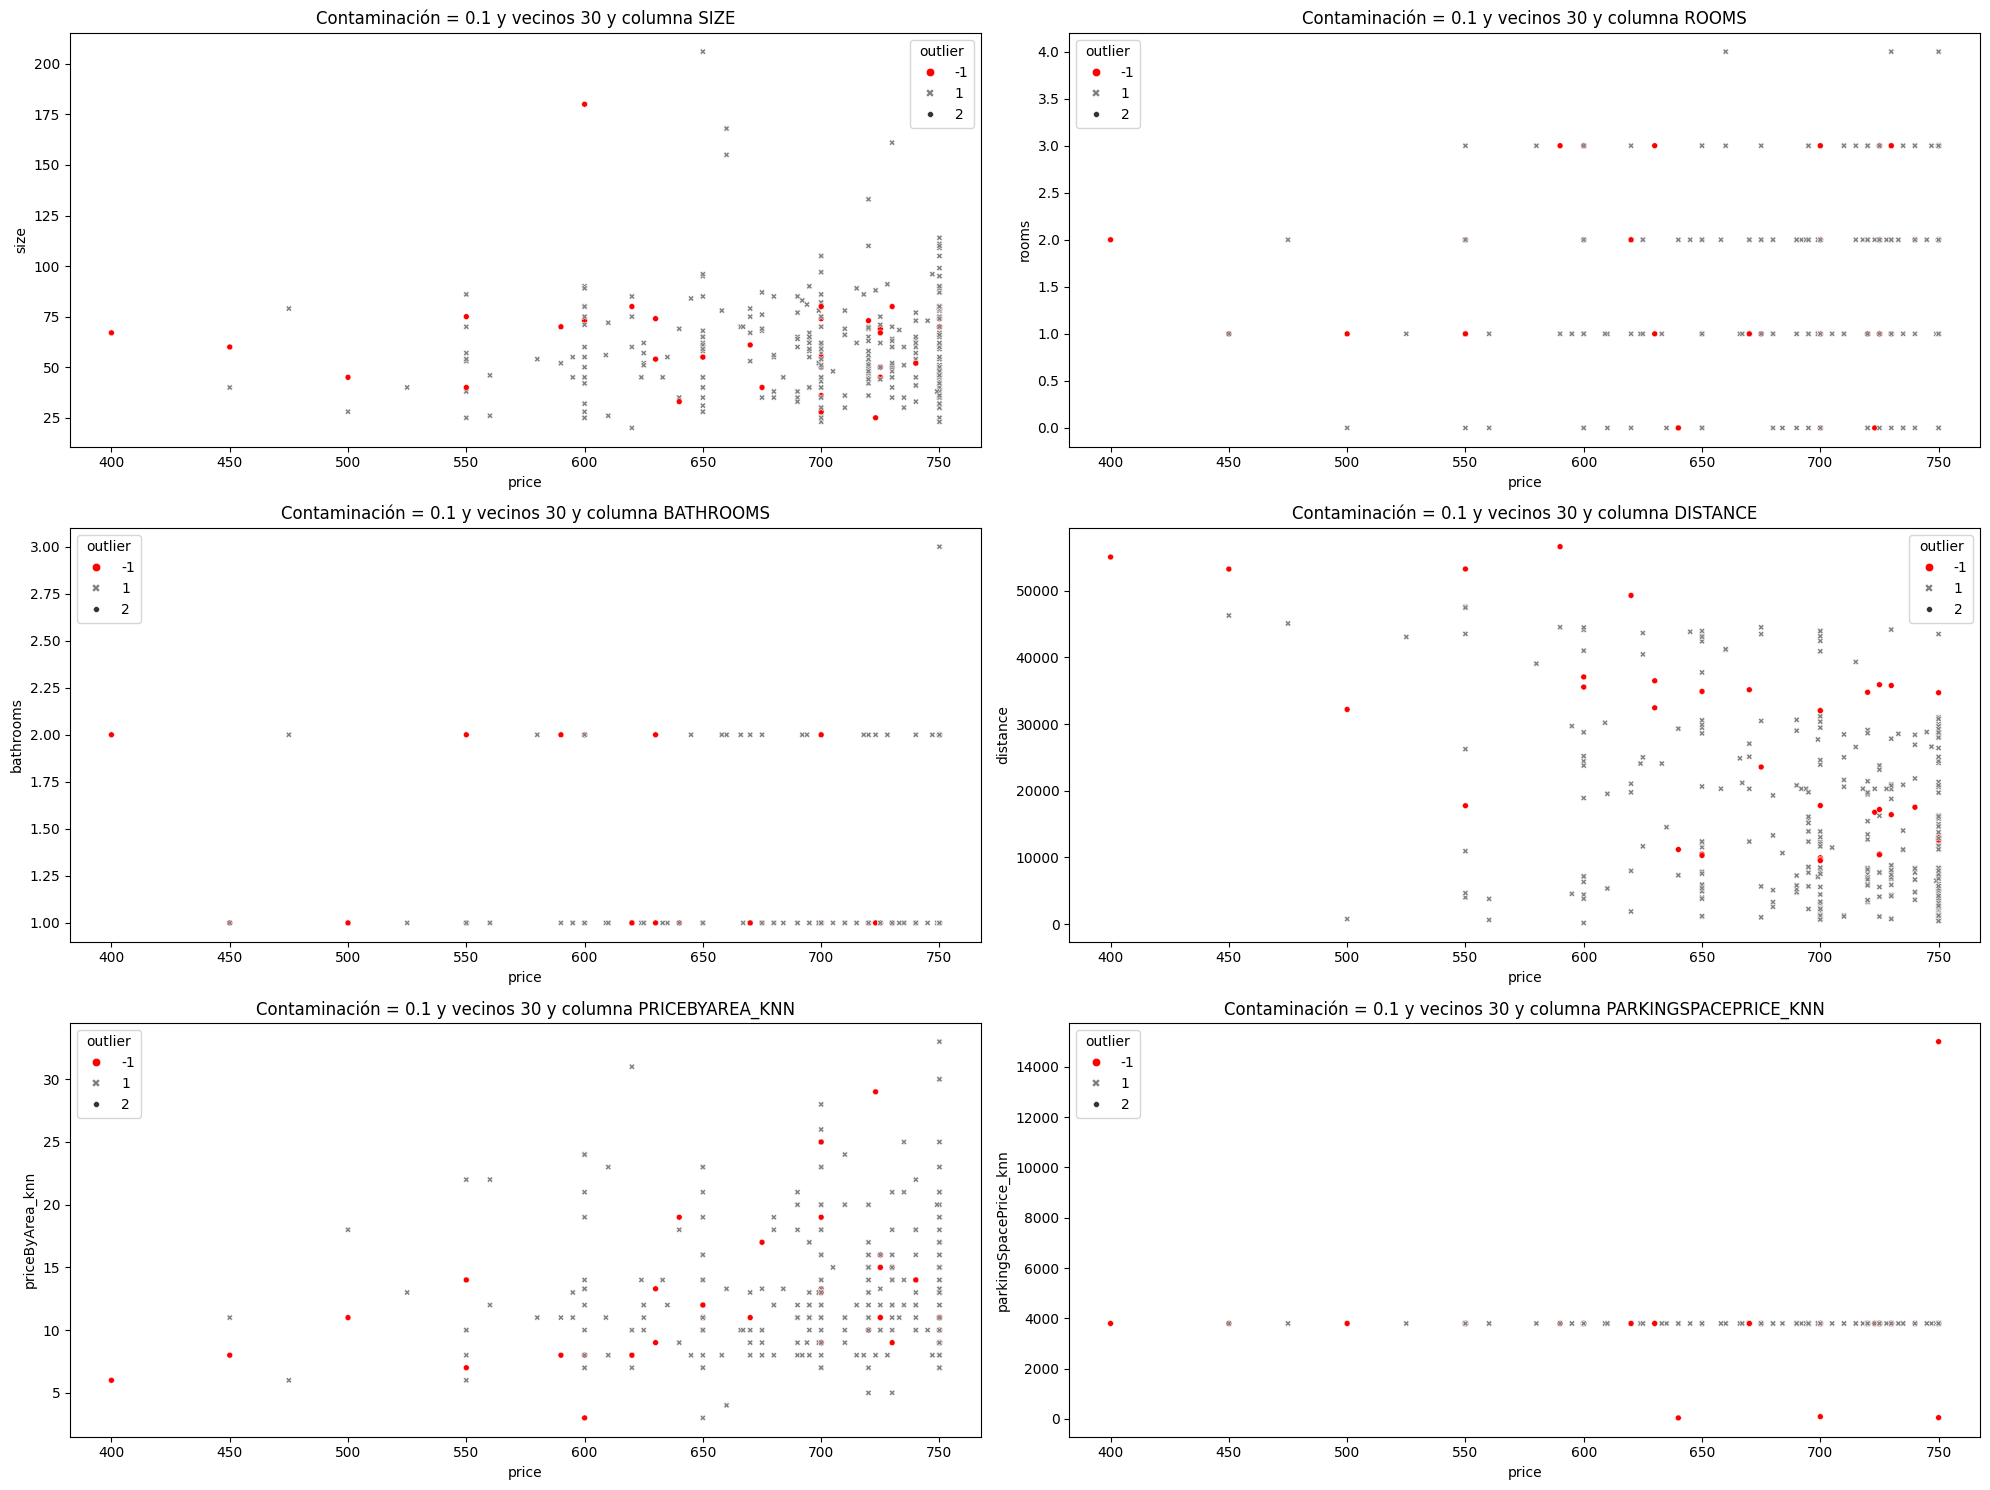

In [29]:
# instanciamos la clase de detección de outliers multivariados
gestion_multi = so.GestionOutliersMultivariados(df)
gestion_multi.explorar_outliers_lof("price")

In [30]:
df_outliers = gestion_multi.detectar_outliers_if(contaminacion=0.05)


In [31]:
# llamamos al método que nos permite imputar los outliers
df_final = gestion_multi.imputar_outliers(data = df_outliers, metodo = "mediana")
df_final.head()

,propertyType,size,exterior,rooms,bathrooms,municipality,showAddress,distance,status,newDevelopment,floor,district,neighborhood,hasLift,hasParkingSpace,isParkingSpaceIncludedInPrice,typology,subTypology,priceByArea_knn,parkingSpacePrice_knn
price,,,,,,,,,,,,,,,,,,,,
750.0,flat,60.0,True,1,1,Madrid,True,7037,good,False,3,Hortaleza,Canillas,True,Unknown,Unknown,flat,Unknown,13.000000,3795.0
750.0,flat,70.0,True,2,1,San Sebastián de los Reyes,False,16145,good,False,bj,Centro Urbano,Unknown,False,Unknown,Unknown,flat,Unknown,11.000000,3795.0
400.0,penthouse,56.0,True,2,1,Villamanrique de Tajo,False,11666,good,False,2,Unknown,Unknown,False,Unknown,Unknown,flat,penthouse,12.000000,3795.0
590.0,flat,56.0,True,2,1,Rascafría,False,11666,good,False,Unknown,Unknown,Unknown,False,Unknown,Unknown,flat,Unknown,12.000000,3795.0
684.0,studio,45.0,True,0,1,Madrid,True,10656,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,13.294985,3795.0


In [32]:
# guardamos el conjunto de datos para el siguiente paso
df_final.to_csv("datos/datos_estan_sinout.csv")